In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

Beginning Data Retrieval
------------------------


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#print(coordinates)
len(coordinates)

1500

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [5]:
# Loop through all the cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | coahuayana
Processing Record 2 of Set 1 | manzil tamim
City not found. Skipping...
Processing Record 3 of Set 1 | kirakira
Processing Record 4 of Set 1 | goderich
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | nguiu
City not found. Skipping...
Processing Record 10 of Set 1 | bandarbeyla
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | lata
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | amderma
City not found. Skipping...
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | karatau
Processin

Processing Record 39 of Set 4 | nioki
Processing Record 40 of Set 4 | lagoa
Processing Record 41 of Set 4 | kholmogory
Processing Record 42 of Set 4 | cherskiy
Processing Record 43 of Set 4 | salalah
Processing Record 44 of Set 4 | friesoythe
Processing Record 45 of Set 4 | palmer
Processing Record 46 of Set 4 | prince rupert
Processing Record 47 of Set 4 | barrow
Processing Record 48 of Set 4 | moranbah
Processing Record 49 of Set 4 | filingue
Processing Record 50 of Set 4 | nouadhibou
Processing Record 1 of Set 5 | galiwinku
City not found. Skipping...
Processing Record 2 of Set 5 | nishihara
Processing Record 3 of Set 5 | ilulissat
Processing Record 4 of Set 5 | kushima
Processing Record 5 of Set 5 | nam som
Processing Record 6 of Set 5 | port-gentil
Processing Record 7 of Set 5 | havoysund
Processing Record 8 of Set 5 | touros
Processing Record 9 of Set 5 | saldanha
Processing Record 10 of Set 5 | honiara
Processing Record 11 of Set 5 | valparaiso
Processing Record 12 of Set 5 | me

Processing Record 27 of Set 8 | hihifo
City not found. Skipping...
Processing Record 28 of Set 8 | sobolevo
Processing Record 29 of Set 8 | portland
Processing Record 30 of Set 8 | skibbereen
Processing Record 31 of Set 8 | mochudi
Processing Record 32 of Set 8 | luanda
Processing Record 33 of Set 8 | antalaha
Processing Record 34 of Set 8 | okhotsk
Processing Record 35 of Set 8 | mackay
Processing Record 36 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 37 of Set 8 | marcona
City not found. Skipping...
Processing Record 38 of Set 8 | keti bandar
Processing Record 39 of Set 8 | sola
Processing Record 40 of Set 8 | rodos
Processing Record 41 of Set 8 | soligalich
Processing Record 42 of Set 8 | jiazi
Processing Record 43 of Set 8 | georgetown
Processing Record 44 of Set 8 | udachnyy
Processing Record 45 of Set 8 | ponta do sol
Processing Record 46 of Set 8 | euclides da cunha
Processing Record 47 of Set 8 | falealupo
City not found. Skipping...
Processing 

Processing Record 13 of Set 12 | darhan
Processing Record 14 of Set 12 | uthal
Processing Record 15 of Set 12 | tessalit
Processing Record 16 of Set 12 | vieux fort
Processing Record 17 of Set 12 | toliary
City not found. Skipping...
Processing Record 18 of Set 12 | taltal
Processing Record 19 of Set 12 | grand gaube
Processing Record 20 of Set 12 | isla vista
Processing Record 21 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 22 of Set 12 | bairiki
Processing Record 23 of Set 12 | alikalia
Processing Record 24 of Set 12 | goundi
Processing Record 25 of Set 12 | sirur
Processing Record 26 of Set 12 | wana
Processing Record 27 of Set 12 | jennings
Processing Record 28 of Set 12 | mao
Processing Record 29 of Set 12 | mount gambier
Processing Record 30 of Set 12 | harrison
Processing Record 31 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 32 of Set 12 | tara
Processing Record 33 of Set 12 | aflu
City not found. Skipping...
Processing 

In [6]:
len(city_data)

568

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coahuayana,MX,2020-10-27 05:07:23,18.73,-103.68,78.85,89,92,1.90
1,Kirakira,SB,2020-10-27 05:07:23,-10.45,161.92,83.37,76,100,6.91
2,Goderich,CA,2020-10-27 05:07:24,43.75,-81.72,44.01,88,100,8.84
3,Qaanaaq,GL,2020-10-27 05:07:24,77.48,-69.36,8.17,78,90,9.26
4,Rikitea,PF,2020-10-27 05:07:24,-23.12,-134.97,75.52,87,97,17.25
5,Bandarbeyla,SO,2020-10-27 05:07:24,9.49,50.81,77.97,55,72,11.27
6,Mahebourg,MU,2020-10-27 05:07:25,-20.41,57.70,77.00,65,40,11.41
7,Kapaa,US,2020-10-27 05:07:25,22.08,-159.32,73.40,88,90,5.82
8,Bilibino,RU,2020-10-27 05:07:25,68.05,166.44,3.06,92,99,2.93
9,Lata,PT,2020-10-27 05:07:25,40.16,-8.33,54.00,92,66,3.20


In [9]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module
import time
# Get today's date in seconds
today = time.strftime("%x")
today

'10/26/20'

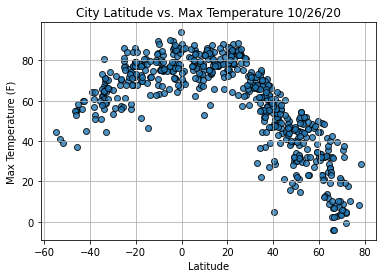

In [12]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig1.png")

#Show plot
plt.show()

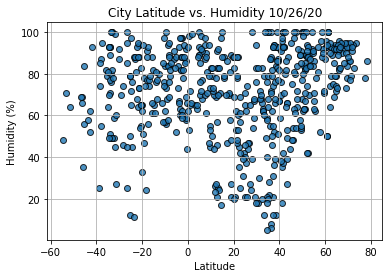

In [13]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig2.png")

#Show plot
plt.show()

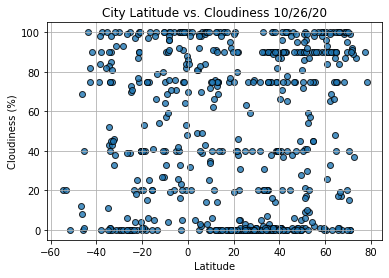

In [14]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig3.png")

#Show plot
plt.show()

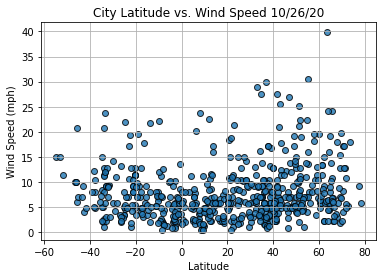

In [15]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/fig4.png")

#Show plot
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y_values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create northen and southern hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coahuayana,MX,2020-10-27 05:07:23,18.73,-103.68,78.85,89,92,1.90
2,Goderich,CA,2020-10-27 05:07:24,43.75,-81.72,44.01,88,100,8.84
3,Qaanaaq,GL,2020-10-27 05:07:24,77.48,-69.36,8.17,78,90,9.26
5,Bandarbeyla,SO,2020-10-27 05:07:24,9.49,50.81,77.97,55,72,11.27
7,Kapaa,US,2020-10-27 05:07:25,22.08,-159.32,73.40,88,90,5.82


In [21]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,40))

NameError: name 'linregress' is not defined